In [95]:
import pandas as pd
import sklearn
import scipy
import numpy as np
import seaborn
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [96]:
col_num = 16
data = pd.read_csv("diabetes_data_upload.csv")

In [97]:
# Change all categorial into binary values
# Male will be 0 and Female will be 1 (seems to make the models work better)
data = data.replace(["Yes", "No", "Male", "Female", "Positive", "Negative"], [1, 0, 0, 1, 1, 0])
# data = data.drop("Age", axis=1)
data.Age

0      40
1      58
2      41
3      45
4      60
       ..
515    39
516    48
517    58
518    32
519    42
Name: Age, Length: 520, dtype: int64

In [98]:
#Assess the mean and range of age
data.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.369231,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Age Distribution')

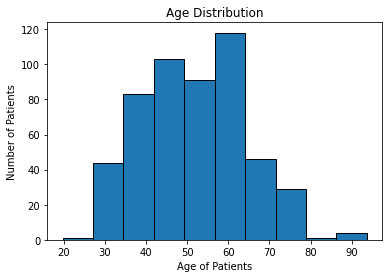

In [99]:
#See data distribution by age on histogram
import matplotlib.pyplot as plt
plt.hist(data['Age'], align="right", edgecolor='black')
plt.xlabel("Age of Patients")
plt.ylabel("Number of Patients")
plt.title("Age Distribution")

In [100]:
#Decide that 48 is a good age to split the data evenly
#you will want to only run this square once, or it will turn all values to 0. 
age = 48
data['Age'] = np.where(data['Age']<=age,0, data['Age'])
data['Age'] = np.where(data['Age']>age, 1, data['Age'])
data.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,0.446154,0.369231,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,0.497571,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

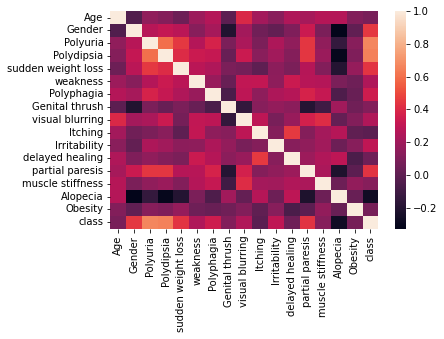

In [101]:
# First try Pearson's correlation
correlation = data.corr(method="pearson")
seaborn.heatmap(correlation)

In [102]:
for col in data:
    print(correlation[col].sort_values(ascending=False))
    print("\n")

Age                   1.000000
visual blurring       0.397107
muscle stiffness      0.263705
Alopecia              0.261688
Polyphagia            0.258368
delayed healing       0.243509
partial paresis       0.219232
Itching               0.209936
weakness              0.187936
Polyuria              0.153917
Irritability          0.133487
Polydipsia            0.117050
Obesity               0.110795
class                 0.081354
sudden weight loss    0.040675
Genital thrush       -0.007005
Gender               -0.045385
Name: Age, dtype: float64


Gender                1.000000
class                 0.449233
partial paresis       0.332288
Polydipsia            0.312262
sudden weight loss    0.281840
Polyuria              0.268894
Polyphagia            0.219968
visual blurring       0.208092
weakness              0.124490
delayed healing       0.101978
muscle stiffness      0.090542
Itching               0.052496
Irritability          0.013735
Obesity               0.005396
Age        

In [103]:
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [104]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [105]:
features = data.columns[:16]
target = data.columns[-1:]
X = data[features]
y = data[target]


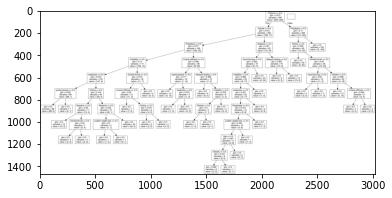

In [106]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()